# Welcome !
#### Dynamic Soaring Flight Tests webpage : https://mrtbrnz.github.io/dynamic_soaring/

#### If you are in Google Colab environment :
- Let's start by cloning the reprository into Google's server 
- Nothing will be installed into your personal computers !!!
- Everything is installed and run on hosted computer, so experiment and enjoy !
- Contact me : murat.bronz(at)enac.fr


In [ ]:
# !!! Run this cell ONLY if you are in Colab !!!
!git clone --recursive https://github.com/mrtbrnz/dynamic_soaring.git
# git submodule update --init --recursive
%cd dynamic_soaring/pprz_data
%pip install .
%cd ../notebooks/

In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! sudo apt install cm-super

### Otherwise, you can continue 
(Assuming that you have cloned the repository and installed the pprz_data utility into your local computer like above)

In [19]:
# Now to import some libraries
import math
import numpy as np
from numpy import sin, cos, pi, sqrt, dot
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from scipy import signal

from pprz_data.pprz_data import DATA

In [17]:
def throttle_of_airspeed(v):
    fun = lambda x : x*2.4 + 0
    return fun(v)

In [29]:
def process_pprz_sd(filename, ac_id='7'):
    ac_id = ac_id
    pprz = DATA(filename, ac_id, data_type='flight')
    return pprz.df_All

def process_lidar_file(filename):
    df = pd.read_csv(filename , delimiter='\t', skiprows=41, encoding='iso-8859-1')
    return df

In [28]:
# Selected Flights (presented in the Part-2 Paper) Dictionary numbers 4-5-7 are kept as it was referenced in the paper.
flights={}
flights[4]={'file_sd':'../data/16_04_2021_Muret/Flight_2/21_04_16__12_39_53_SD.data', 'file_lidar':'../data/16_04_2021_Muret/Lidar/WLS71086_2021_04_16__10_57_20.rtd', 'file_probe':'../data/16_04_2021_Muret/Flight_2/smartprobe_91.tsv'}
flights[5]={'file_sd':'../data/16_04_2021_Muret/Flight_3/21_04_16__13_05_12_SD.data', 'file_lidar':'../data/16_04_2021_Muret/Lidar/WLS71086_2021_04_16__10_57_20.rtd', 'file_probe':'../data/16_04_2021_Muret/Flight_3/smartprobe_92.tsv'}
flights[7]={'file_sd':'../data/22_04_2021_Muret/Flight_2/21_04_22__11_23_56_SD.data', 'file_lidar':'', 'file_probe':''}


In [5]:
dfs={}
for i,values in zip(flights.keys(),flights.values()):
    filename=values['file_sd']
    dfs[i]=process_pprz_sd(filename)

 IMU Scaled Acceleration msg doesnt exist 
 IMU Raw Acceleration msg doesnt exist 
 Generating 3D velocity...
 IMU Scaled Gyro msg doesnt exist 
 IMU Raw Gyro msg doesnt exist 
 Fault Telemetry msg doesnt exist 
 Actuators msg doesnt exist 
 Gust msg does not exist 
 Rotorcraft_fp msg does not exist 
Min time : 34.401 Maximum time : 1426.201
 IMU Scaled Acceleration msg doesnt exist 
 IMU Raw Acceleration msg doesnt exist 
 Generating 3D velocity...
 IMU Scaled Gyro msg doesnt exist 
 IMU Raw Gyro msg doesnt exist 
 Fault Telemetry msg doesnt exist 
 Actuators msg doesnt exist 
 Gust msg does not exist 
 Rotorcraft_fp msg does not exist 
Min time : 34.401 Maximum time : 1315.501
 IMU Scaled Acceleration msg doesnt exist 
 IMU Raw Acceleration msg doesnt exist 
 Generating 3D velocity...
 IMU Scaled Gyro msg doesnt exist 
 IMU Raw Gyro msg doesnt exist 
 Fault Telemetry msg doesnt exist 
 Actuators msg doesnt exist 
 Gust msg does not exist 
 Rotorcraft_fp msg does not exist 
Min time :

In [7]:
dfs[4].columns

Index(['phi', 'psi', 'theta', 'mode', 'Ax', 'Ay', 'Az', 'east', 'north',
       'course', 'alt', 'vel', 'climb', 'vel_3d', 'Gx', 'Gy', 'Gz', 'C0', 'C1',
       'C2', 'Throttle', 'Volt', 'Amp', 'Watt', 'mAh', 'Wh', 'Ps', 'Pdyn_AD',
       'temp', 'qnh', 'amsl_baro', 'airspeed', 'TAS', 'D_roll', 'D_pitch',
       'D_course', 'D_x', 'D_y', 'D_altitude', 'D_climb', 'D_airspeed',
       'sp_Va', 'sp_aoa', 'sp_beta', 'sp_dyn_p', 'sp_sta_p', 'sp_wx', 'sp_wz',
       'sp_d_wx', 'sp_d_wz', 'sp_w_power'],
      dtype='object')

In [8]:
def plot_trajectory(df,limits=(0,2000)):
    st,fn = limits
    x = df[st:fn].east.values ; x=x-x[0]
    y = df[st:fn].north.values ; y=y-y[0]
    z = df[st:fn].alt.values ; z=z-z[0]
    Ax = df[st:fn].Ax.values
    Az = df[st:fn].Az.values
    climb = df[st:fn].climb.values
    throttle = df[st:fn].Throttle.values
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(-x,y,z)
    plt.show()

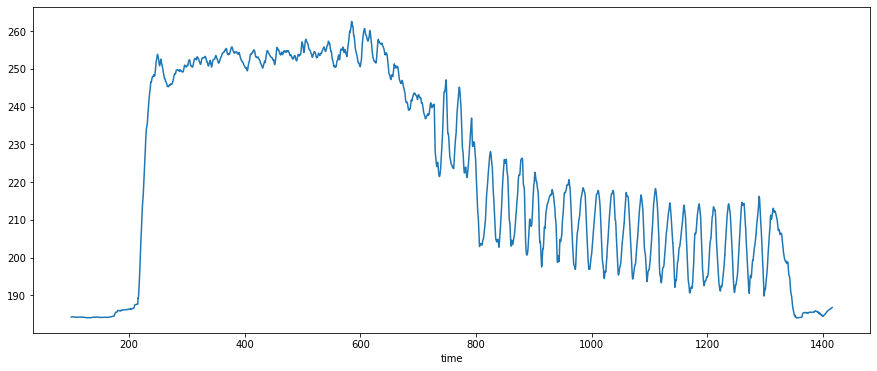

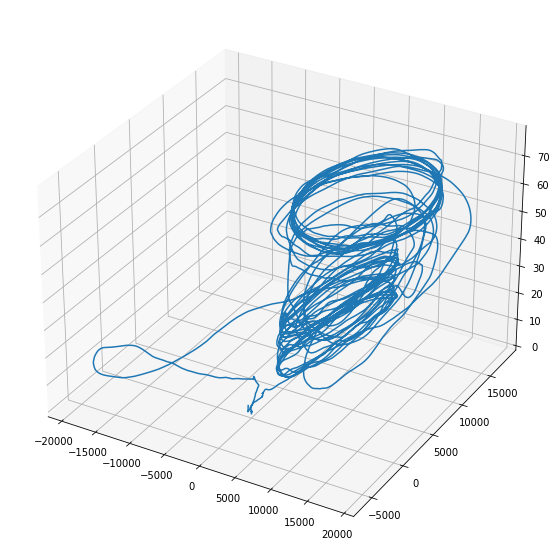

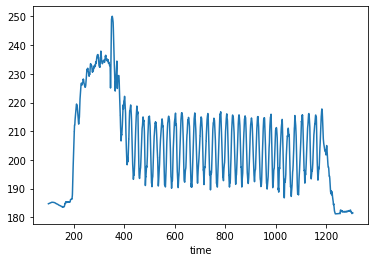

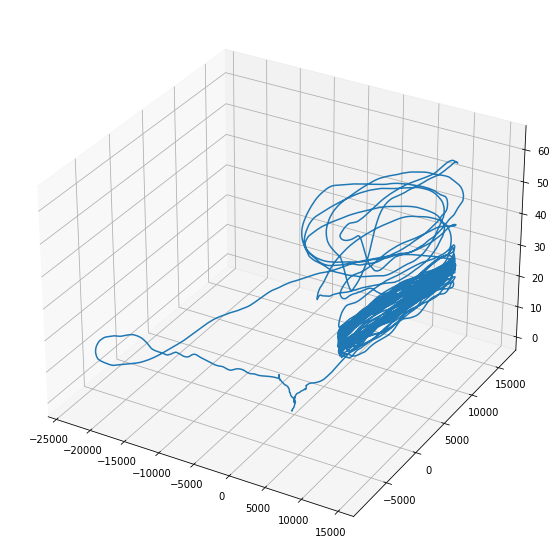

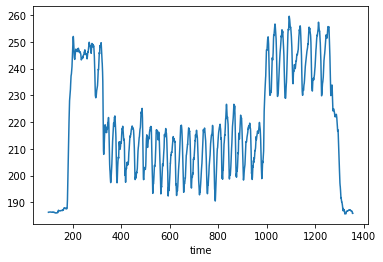

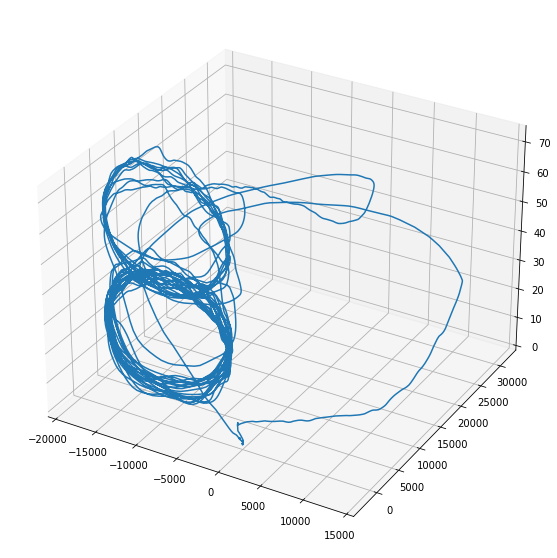

In [9]:
fig = plt.figure(figsize=(15,6))
for i in dfs.keys():
    dfs[i][100:2100].alt.plot()
    # dfs[i].sp_aoa.plot()
    # dfs[i][100:2100]['mode'].plot()
    plot_trajectory(dfs[i])
    # pprz_df[190:280].theta.plot()
    # pprz_df.vel_probe.plot()
    # pprz_df.alpha.plot()
    # pprz_df.vel_3d.plot()
    # pprz_df.vel.plot();plt.show()

In [13]:
def Process_2(df, start, finish, dict_=None, dict_nr=None, filename=None, filter_order=2, cut_off_freq=1, plot_extra=None):
    sf = 100
    st=start;fn=finish;
    xlim1=start;xlim2=finish;
    b, a = signal.butter(filter_order, cut_off_freq/(sf/2), 'low', analog=False)
    padlen = 100
    CD_0 = 0.028
    rho = 1.225
    S_ref= 0.21
    mass  = 1.05   # Aircraft mass [kg]
    AR = 11.84
    e = 0.85
    gee   = 9.81
    alt_0 = df.alt[st:st+1/sf].values #383. # Reference zero potential energy altitude ASL[m]
    pitch_offset = 2.3/57.3   # 2.3 normally
    ########################
#     time = df[st:fn].index
# #     vel   = signal.filtfilt(b, a, df.airspeed[st:fn].values, padlen=padlen) # method="gust")
#     vel   = signal.filtfilt(b, a, df.sp_Va[st:fn].values, padlen=padlen)
#     climb = signal.filtfilt(b, a, df.climb[st:fn].values, padlen=padlen)
#     alpha = signal.filtfilt(b, a,df.sp_aoa[st:fn].values, padlen=padlen)
#     pitch = signal.filtfilt(b, a,df.theta[st:fn].values, padlen=padlen)
#     roll  = signal.filtfilt(b, a,df.phi[st:fn].values, padlen=padlen)
#     yaw   = signal.filtfilt(b, a,df.psi[st:fn].values, padlen=padlen)
#     p     = signal.filtfilt(b, a,df.Gx[st:fn].values, padlen=padlen)
#     q     = signal.filtfilt(b, a,df.Gy[st:fn].values, padlen=padlen)
#     Ax    = signal.filtfilt(b, a,df.Ax[st:fn].values, padlen=padlen)
#     Ay    = signal.filtfilt(b, a,df.Ay[st:fn].values, padlen=padlen)
#     Az    = signal.filtfilt(b, a,df.Az[st:fn].values, padlen=padlen)
#     alt   = signal.filtfilt(b, a,df.alt[st:fn].values, padlen=padlen)
#     throttle = signal.filtfilt(b, a,df.Throttle[st:fn].values, padlen=padlen)
#     electrical_power = signal.filtfilt(b, a,df.Watt[st:fn].values, padlen=padlen)
#     groundspeed = signal.filtfilt(b, a,df.vel[st:fn].values, padlen=padlen)
#     groundspeed_3d = signal.filtfilt(b, a,df.vel_3d[st:fn].values, padlen=padlen)
    
#     # CHECK THE SOURCE of WX and WZ (Can come from sp, or calculated, etc...)
#     wx = signal.filtfilt(b, a, df.sp_wx[st:fn].values, padlen=padlen)
#     wz = signal.filtfilt(b, a, df.sp_wz[st:fn].values, padlen=padlen)
    ########################
    
    window=300
    st = st-window/sf
    time = df[st:fn].index[window:]
#     vel   = df.airspeed[st:fn].rolling(window=window).mean().values[window:]
    vel   = df.sp_Va[st:fn].rolling(window=window).mean().values[window:]
    climb = df.climb[st:fn].rolling(window=window).mean().values[window:]
    alpha = df.sp_aoa[st:fn].rolling(window=window).mean().values[window:]
    pitch = pitch_offset + df.theta[st:fn].rolling(window=window).mean().values[window:]
    roll  = df.phi[st:fn].rolling(window=window).mean().values[window:]
    yaw   = df.psi[st:fn].rolling(window=window).mean().values[window:]
    p     = df.Gx[st:fn].rolling(window=window).mean().values[window:]
    q     = df.Gy[st:fn].rolling(window=window).mean().values[window:]
    Ax    = df.Ax[st:fn].rolling(window=window).mean().values[window:]
    Ay    = df.Ay[st:fn].rolling(window=window).mean().values[window:]
    Az    = df.Az[st:fn].rolling(window=window).mean().values[window:]
    alt   = df.alt[st:fn].rolling(window=window).mean().values[window:]
    throttle         = df.Throttle[st:fn].rolling(window=window).mean().values[window:]
    electrical_power = df.Watt[st:fn].rolling(window=window).mean().values[window:]
    groundspeed      = df.vel[st:fn].rolling(window=window).mean().values[window:]
    groundspeed_3d   = df.vel_3d[st:fn].rolling(window=window).mean().values[window:]
    
    # CHECK THE SOURCE of WX and WZ (Can come from sp, or calculated, etc...)
    wx = df.sp_wx[st:fn].rolling(window=window).mean().values[window:]
    wz = df.sp_wz[st:fn].rolling(window=window).mean().values[window:]
    ########################
    

    Lift = -Az * mass
    CL = Lift/ (0.5*rho*vel*vel*S_ref)
    CD = CD_0 + CL*CL/(np.pi*AR*e)
    gamma = pitch - alpha
    
    d_wx = np.hstack((np.zeros(1), np.diff(wx,1,axis=0)))*sf
    d_wz = np.hstack((np.zeros(1), np.diff(wz,1,axis=0)))*sf
    d_alt = np.hstack((np.zeros(1), np.diff(alt,1,axis=0)))*sf
    # this is like F=ma , where acceleration is coming from the change of w_x
#     F_fi = mass*d_wx*cos(gamma)*d_alt
    D = -0.5*rho*vel**2*S_ref*CD
    ax_wind = -d_wx*(sin(gamma) * cos(gamma) )
    az_wind =  d_wz*cos(gamma)

    P_drag= vel * D
    P_dwx = -d_wx*(-vel * np.sign(gamma) * cos(gamma) ) # With sign only
#     P_dwx = -d_wx*(-vel * cos(gamma) ) # New
    P_dwz =  d_wz*(vel * sin(gamma) )

    e_pot = (mass*gee*(alt-alt_0))
#     e_kin = (0.5*mass*groundspeed_3d**2)/(mass*gee)
#     e_tot = e_pot + e_kin


    e_kin_air = (0.5*mass*vel**2)
    e_tot_air = e_kin_air + e_pot

#     plot_all_0()
    
#     mpl.style.use('default') #seaborn, default, seaborn-paper
    matplotlib.rcParams['text.usetex'] = True
    plt.rcParams["font.family"] = "Serif"
    plt.rcParams["font.size"] = 11  

    fig = plt.figure(figsize=(10,14.5))
    ax = fig.add_subplot(611)
    ax.set_title('Energy in Air-Path Frame')
    ax.plot(time,e_tot_air, label='$E_{Total}$')
    ax.plot(time,e_kin_air, label='$E_{Kinetic}$')
    ax.plot(time,e_pot, label='$E_{Potential}$')
    # plt.plot(cycle_time,e_pot, label='Potential Energy');plt.plot(cycle_time,e_tot_air, label='Total Energy in A');
    ax.grid();ax.legend();ax.set_ylabel('Energy [J]')#plt.ylabel('Energy/(mg) [m]')
    ax.set_xlim([xlim1,xlim2]);#;plt.xlim([0,1])#;plt.ylim([0,70])
    ax.set_xticklabels([])

    ax = fig.add_subplot(612)
    ax.plot(time,(alt-alt_0), label='Height')
    ax.plot(time,vel, label='$V_a$');
#     plt.plot(time, groundspeed, label='$V_{i-XY}$');
    ax.plot(time, groundspeed_3d, label='$V_{i}$');
    ax.grid();
    ax.set_ylabel('Height [m] $\&$ \\\ Speed [m/s]');
    ax.legend();
    ax.set_xlim([xlim1,xlim2]); #plt.ylim([0,35]) #plt.xlim([0,1]);
    ax.set_xticklabels([])
#     plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')

    ax = fig.add_subplot(613)
#     plt.plot(t_pprz,CL, label='$C_L$');
#     ax.plot(time,pitch*57.3, label='$\theta$ [deg]');
    ax.plot(time,gamma*57.3, label='$\gamma$ [deg]');
    ax.plot(time,wx, label='$W_x$');
    ax.plot(time,d_wx, label='$\dot{W_x}$');
#     plt.plot(t_pprz,d_wx_alt, label='$\dot{W_xalt}$');
#     ax.plot(time,wz, label='$W_z$');
#     ax.plot(time,-climb, label='$Vi_z$');
#     plt.plot(time,vel_pprz*cos(np.deg2rad(gamma_pprz)), label='V cos gama');
#     plt.plot(time,vel_pprz*sin(np.deg2rad(gamma_pprz)), label='V sin gama');
#     plt.plot(time,vel_pprz**2*cos(np.deg2rad(gamma_pprz))*sin(np.deg2rad(gamma_pprz)), label='V^2 sin gama cos gama');
    ax.grid();ax.legend();ax.set_ylabel('  Flight Path ($\gamma$) [deg] \\\  Wind Speed [$m/s$] \\\  Gradient [$m/s^2$]');#plt.ylim([-12,12]);
    ax.set_xlim([xlim1,xlim2]);ax.set_xticklabels([])

    ax = fig.add_subplot(614)
    ax.plot(time, P_drag, color='red', label='$P_D$  [W], $\sum{P_D}$ = %0.2f [Ws]' % (np.nansum(P_drag)/100) ) 
#     plt.annotate('$\sum{P_D}$ = %0.2f [Ws]' % (np.nansum(P_drag)/100),
#             xy=(.6, .385), xycoords='figure fraction',
#             horizontalalignment='left', verticalalignment='top',
#             fontsize=12, bbox=dict(boxstyle="round", fc=".97"))
    #; plt.annotate('$\sum{P_D}$ = %0.2f [Ws]' % (np.nansum(P_drag)/100),(200,-200))
#     plt.fill_between(t_pprz,0,P_drag, alpha=0.50, color='red', interpolate=True,label='DRAG Power, sum = %0.2f Ws' % (np.nansum(P_drag)/100))
    ax.plot(time,P_dwx, color='black', alpha=0.6, label='$P_{\dot{W}_X}$ [W], $\sum{P_{\dot{W}_X}}$ = %0.2f [Ws]' % ((np.nansum(P_dwx)/100) ))#, (np.nansum(P_dwx)/100)/(np.nansum(P_drag)/100) ));
    ax.fill_between(time,0,P_dwx, where=(P_dwx >= 0), alpha=0.50, color='green', interpolate=True)#, label='P$_{\dot{w_x}}$, sum = %0.2f [Ws]' % (np.nansum(P_dwx)/100))#, label='P$_{\dot{w}}$');
    ax.fill_between(time,0,P_dwx, where=(P_dwx < 0), alpha=0.50, color='red', interpolate=True)#, label='P$_{\dot{w}}$');
    ax.grid();ax.legend();ax.set_ylabel('Power ($P_{\dot{W}_X}\, \& \, P_D$)  [W]');ax.set_xlim([xlim1,xlim2]);plt.ylim([-100,120])#;plt.xlim([0,1])#;
    ax.set_xticklabels([])

    ax = fig.add_subplot(615)
    ax.plot(time,P_dwz, color='black', alpha=0.3, label='$P_{\dot{W_Z}}$, $\sum{P_{\dot{W_Z}}}$ = %0.2f [Ws]' % (np.nansum(P_dwz)/100) );
    ax.fill_between(time,0,P_dwz, where=(P_dwz >= 0), alpha=0.50, color='green', interpolate=True)#, label='P$_{\dot{w}}$');
    ax.fill_between(time,0,P_dwz, where=(P_dwz < 0), alpha=0.50, color='red', interpolate=True)#, label='P$_{\dot{w}}$');
    ax.grid();plt.legend();plt.ylabel('Power ($P_{\dot{W}_Z}$)  [W]');ax.set_xlim([xlim1,xlim2]);ax.set_ylim([-100,120])#;plt.xlim([0,1])#;plt.ylim([-10,10])
    ax.set_xticklabels([])

#     plt.subplot(515)#;plt.plot(t_pprz,(D), label='Drag');
#     # plt.plot(cycle_time,a_wind, label='$F_{fi}$');plt.grid();plt.legend();plt.xlim([0,1])#;plt.ylim([360,460])
#     # plt.plot(cycle_time,additional, label='P$_{\dot{w}}$');
#     plt.plot(t_pprz,additional, color='black', alpha=0.2, label='P$_{\dot{w}}$');
#     plt.fill_between(t_pprz,0,additional, where=(additional >= 0), alpha=0.50, color='green', interpolate=True, label='P$_{\dot{w}}$');
#     plt.fill_between(t_pprz,0,additional, where=(additional < 0), alpha=0.50, color='red', interpolate=True, label='P$_{\dot{w}}$');
#     plt.grid();plt.ylabel('additional...');plt.ylim([-250,200])#; plt.xlim([0,1])
    # plt.legend()
#     plt.xlabel("Cycle Time $(t/t_{cycle})$ [-]")
#     throttle_limit = 40.
    propulsion_eff = 0.4
    fv = [throttle_of_airspeed(v_) for v_ in vel]
    
    ax = fig.add_subplot(616);
    ax.plot(time,throttle, label='Throttle,  Averaged = %0.2f' % (np.nanmean(throttle)) );
    ax.fill_between(time,0,electrical_power, where=(throttle >= fv), alpha=0.20, color='grey', interpolate=True, label='$\sim\sum{P_{Aero.}}$ = %0.2f [Ws]' % (np.nansum(electrical_power[throttle>=fv])/100.* propulsion_eff))
#     ax.fill_between(time,0,electrical_power, where=(throttle >= throttle_limit), alpha=0.20, color='grey', interpolate=True, label='$\sim\sum{P_{Aero.}}$ = %0.2f [Ws]' % (np.nansum(electrical_power[throttle>=throttle_limit])/100.* propulsion_eff))
    ax.plot(time,electrical_power, label='$P_{Elec.}$ [W] , $\sum{P_{Elec.}}$ = %0.2f [Ws]' % (np.nansum(electrical_power)/100) ); #np.nanmean(electrical_power),
    ax.grid();plt.legend();ax.set_ylabel('Throttle [\%] \& \\\ Elec. Power ($P_{Elec.}$) [W]');ax.set_xlim([xlim1,xlim2]);#;plt.xlim([xlim1,xlim2]);plt.ylim([0,100])
#     plt.xlabel("Time [s]")
    ax.set_xlabel('Time [s]')
    if filename !=None: plt.savefig('plots/'+ filename, dpi=30, bbox_inches='tight')
    if ((dict_ != None) and (dict_nr != None)):
        dict2={}
        dict2['Power_balance'] = e_tot_air[-1] - next(x for x in e_tot_air if not math.isnan(x))
        dict2['Power_wx'] = np.nansum(P_dwx)/100
        dict2['Power_wz'] = np.nansum(P_dwz)/100
        dict2['Power_drag'] = np.nansum(P_drag)/100
        dict2['Throttle']   = np.nanmean(throttle)
        dict2['Power_electric'] = np.nansum(electrical_power)/100
        dict2['Alt_avg'] = np.nanmean(alt)
        dict2['Vel_avg'] = np.nanmean(vel)
        dict2['Wx_avg'] = np.mean(np.sqrt(wx*wx))
        dict2['duration'] = fn-st
        dict2['Alpha_avg'] = np.mean(np.sqrt(alpha*alpha))
        dict_[dict_nr]=dict2
    plt.show()
    
    if plot_extra:
        plt.plot(wx,alt)
        plt.show()

        matplotlib.rcParams['text.usetex'] = True
        plt.rcParams["font.family"] = "Serif"#"Times New Roman" #"Serif"#     plt.rcParams["font.family"] = "Times New Roman"
        plt.rcParams["font.size"] = 11
        
        fig = plt.figure(figsize=(10,4))
        plt.subplot(211)
    #     plt.plot(time,df.airspeed[st:fn].values[window:],alpha=0.4, color='black', label='Raw Signal')
        plt.plot(time,df.sp_Va[st:fn].values[window:],alpha=0.4, color='black', label='Raw Signal')
    #     plt.plot(time,df.sp_Va[st:fn].values,alpha=0.4, color='black', label='Raw Signal')
        plt.plot(time,vel, label='Filtered Signal')
        plt.xlabel('Time [s]')
        plt.ylabel('Airspeed [m/s]')
        plt.grid();plt.legend()
        plt.subplot(212)
        plt.plot(time,df.sp_aoa[st:fn].values[window:]*57.3, alpha=0.4, color='black', label='Raw Signal')
    #     plt.plot(time,df.sp_aoa[st:fn].values*57.3, alpha=0.4, color='black', label='Raw Signal')
        plt.plot(time,alpha*57.3, label='Filtered Signal')
        plt.xlabel('Time [s]')
        plt.ylabel(r'Angle of Attack ($\alpha$) [deg]')
    #     plt.axvspan(380,1140, alpha=0.3, color='grey')
        plt.grid();plt.legend()
    #     plt.savefig('plots/flight_altitude.pdf', dpi=100, bbox_inches='tight')
#         plt.savefig('plots/'+ 'noisy_data.pdf', dpi=30, bbox_inches='tight')
        plt.show()

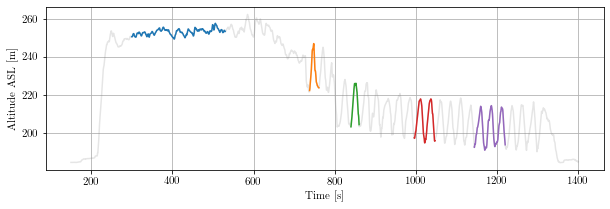

In [27]:
time_list=[(300,530),(738,761),(840,860), (996,1047), (1144,1220)]
st=150;fn=1400
dfs[4][st:fn].alt.plot(figsize=(10,3), color='grey' ,alpha=0.2)
dict4 = {}
# Uncomment the below 3 lines for pretty plots (Does NOT work in Colab !)
# matplotlib.rcParams['text.usetex'] = True
# plt.rcParams["font.family"] = "Serif"
# plt.rcParams["font.size"] = 11 
for i in range(len(time_list)):
    st=time_list[i][0] ; fn=time_list[i][1]
    dfs[4][st:fn].alt.plot()
#     Process_2(dfs[4],st,fn,dict_=dict4, dict_nr=i)  # UNCOMMENT THIS LINE TO SEE DETAILED ANALYSIS OF THE FLIGHT SEGMENT
plt.xlabel('Time [s]')
plt.ylabel('Altitude ASL [m]')
plt.grid()
# plt.savefig('plots/'+ 'flight4_altitudes.pdf', dpi=30, bbox_inches='tight')
plt.show()

In [22]:
def get_performance_table(d):
    print('Trajectory & Duration & Altitude & Airspeed & $\overline{W}_x$  &  Throttle & $P_{elec}$ & Specific Range & $P_D$ &  $\overline{\\alpha}$ \\\ ') #  & $P_{W_x}$
    print('            &    [s]   &    [m]   &   [m/s]  &  [m/s] &  [$\%$]   &  [W]  &    [m/Ws]      &  [W]  & [deg] \\\ ') # &   [W]   
    print('\hline')
    for i in d.keys():
        t = d[i]['duration']
        pel = d[i]['Power_electric']
        pd = d[i]['Power_drag']
        pwx = d[i]['Power_wx']
        wx = d[i]['Wx_avg']
        v = d[i]['Vel_avg']
        alt= d[i]['Alt_avg']
        thr = d[i]['Throttle']
        a = d[i]['Alpha_avg']
        range_ = (t*v)/pel
        print(f' Inclined & {t:0.1f} & {alt:0.1f} & {v:0.1f} & {wx:0.1f} & {thr:0.1f} & {(pel/t):0.1f} & {range_:0.2f} & {pd/t:0.1f} & {a*57.3:0.2f} \\\ ') # & {pwx/t:0.1f} 

In [23]:
def get_specific_range(d):
    for i in d.keys():
        t = d[i]['duration']
        pel = d[i]['Power_electric']
        v = d[i]['Vel_avg']
        range_ = (t*v)/pel
        print(f'Specific range : {range_:0.2f} [m/Ws]')

In [26]:
# If you have uncommented the previous detailed flight analysis, then dict4 will have information inside...
get_specific_range(dict4)
get_performance_table(dict4)

Specific range : 0.37 [m/Ws]
Specific range : 0.51 [m/Ws]
Specific range : 0.49 [m/Ws]
Specific range : 0.45 [m/Ws]
Specific range : 0.56 [m/Ws]
Trajectory & Duration & Altitude & Airspeed & $\overline{W}_x$  &  Throttle & $P_{elec}$ & Specific Range & $P_D$ &  $\overline{\alpha}$ \\ 
            &    [s]   &    [m]   &   [m/s]  &  [m/s] &  [$\%$]   &  [W]  &    [m/Ws]      &  [W]  & [deg] \\ 
\hline
 Inclined & 233.0 & 253.2 & 16.1 & 3.3 & 40.4 & 44.0 & 0.37 & -16.6 & 0.17 \\ 
 Inclined & 26.0 & 232.6 & 16.7 & 3.3 & 25.8 & 32.5 & 0.51 & -16.9 & 0.28 \\ 
 Inclined & 23.0 & 216.6 & 16.3 & 2.9 & 33.5 & 33.0 & 0.49 & -15.4 & 0.22 \\ 
 Inclined & 54.0 & 207.3 & 16.4 & 3.0 & 31.3 & 36.5 & 0.45 & -17.3 & 0.26 \\ 
 Inclined & 79.0 & 202.4 & 16.5 & 2.8 & 27.4 & 29.2 & 0.56 & -17.7 & 0.26 \\ 


# Reading and Analysing WINDCUBE LIDAR Measurements :

In [31]:
lidar_dfs={}
for i,values in zip(flights.keys(),flights.values()):
    filename=values['file_lidar']
    try:
        lidar_dfs[i]=process_lidar_file(filename)
    except:
        pass

In [35]:
lidar_dfs[4].head(5)

,Timestamp,Position,Temperature,Wiper Count,40m CNR (dB),40m Radial Wind Speed (m/s),40m Radial Wind Speed Dispersion (m/s),40m Wind Speed (m/s),40m Wind Direction (°),40m X-wind (m/s),...,Unnamed: 174,170m CNR (dB),170m Radial Wind Speed (m/s),170m Radial Wind Speed Dispersion (m/s),170m Wind Speed (m/s),170m Wind Direction (°),170m X-wind (m/s),170m Y-wind (m/s),170m Z-wind (m/s),Unnamed: 183
0,2021/04/16 10:57:20.17,V,9.9,0,-15.32,-0.52,0.02,NaN,NaN,NaN,...,NaN,-15.24,0.96,0.02,NaN,NaN,NaN,NaN,0.963,NaN
1,2021/04/16 10:57:20.97,0,9.9,0,-16.10,-0.25,0.02,4.58,285.43,1.218,...,NaN,-16.11,1.59,0.02,4.07,306.34,2.411,-3.277,0.963,NaN
2,2021/04/16 10:57:21.77,90,9.9,0,-16.43,-3.14,0.02,4.58,285.43,1.218,...,NaN,-16.12,-1.29,0.02,4.07,306.34,2.411,-3.277,0.963,NaN
3,2021/04/16 10:57:22.57,180,9.9,0,-16.15,-1.40,0.02,4.58,285.43,1.218,...,NaN,-15.76,-0.67,0.02,4.07,306.34,2.411,-3.277,0.963,NaN
4,2021/04/16 10:57:23.37,270,9.9,0,-17.05,1.00,0.02,4.58,285.43,1.218,...,NaN,-17.16,1.78,0.02,4.07,306.34,2.411,-3.277,0.963,NaN


In [36]:
for column in lidar_dfs[4].columns:
    print(column)

Timestamp
Position
Temperature
Wiper Count
40m CNR (dB)
40m Radial Wind Speed (m/s)
40m Radial Wind Speed Dispersion (m/s)
40m Wind Speed (m/s)
40m Wind Direction (°)
40m X-wind (m/s)
40m Y-wind (m/s)
40m Z-wind (m/s)
Unnamed: 12
45m CNR (dB)
45m Radial Wind Speed (m/s)
45m Radial Wind Speed Dispersion (m/s)
45m Wind Speed (m/s)
45m Wind Direction (°)
45m X-wind (m/s)
45m Y-wind (m/s)
45m Z-wind (m/s)
Unnamed: 21
50m CNR (dB)
50m Radial Wind Speed (m/s)
50m Radial Wind Speed Dispersion (m/s)
50m Wind Speed (m/s)
50m Wind Direction (°)
50m X-wind (m/s)
50m Y-wind (m/s)
50m Z-wind (m/s)
Unnamed: 30
55m CNR (dB)
55m Radial Wind Speed (m/s)
55m Radial Wind Speed Dispersion (m/s)
55m Wind Speed (m/s)
55m Wind Direction (°)
55m X-wind (m/s)
55m Y-wind (m/s)
55m Z-wind (m/s)
Unnamed: 39
60m CNR (dB)
60m Radial Wind Speed (m/s)
60m Radial Wind Speed Dispersion (m/s)
60m Wind Speed (m/s)
60m Wind Direction (°)
60m X-wind (m/s)
60m Y-wind (m/s)
60m Z-wind (m/s)
Unnamed: 48
65m CNR (dB)
65m Radia

In [37]:
# Too lazy to do it automatically...
# altitudes = ['40', '45','50','55','60','65','70','75','80','85','90','95','100','110','120','130','140','150','160','170']
altitudes = [40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170]

In [40]:
# You can read any value like this :
# lidar_dfs[4].loc[4,].values[2]
# lidar_dfs[4].iloc[:,2].values
# Or give a condition to select :
# cond = lidar_dfs[4].Position == 'V'
# cond = lidar_dfs[4].Position == '90'
# lidar_dfs[4][cond].iloc[:,2]

In [45]:
def plot_wind(df):
    fig=plt.figure(figsize=(5,10))
    for i in range(50):
        wind_array = [df[str(alt)+'m Wind Speed (m/s)'].values[i] for alt in altitudes]
        plt.plot(wind_array,altitudes)
    plt.ylabel('Height AGL [m]')
    plt.xlabel('Wind Speed [m/s]')

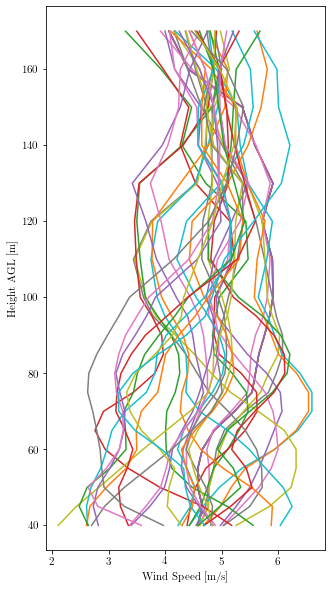

In [46]:
plot_wind(lidar_dfs[4])

In [47]:
def plot_wind_2(df):
    fig=plt.figure(figsize=(5,10))
    cond = df.Position == '0'
    for i in range(10):
        wind_array = [df[cond][str(alt)+'m Wind Speed (m/s)'].values[i] for alt in altitudes]
        plt.plot(wind_array,altitudes)
    plt.ylabel('Height AGL [m]')
    plt.xlabel('Wind Speed [m/s]')

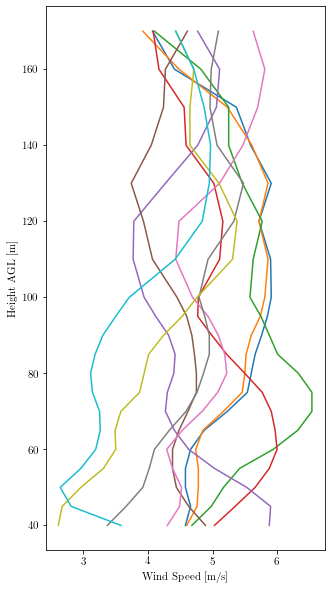

In [48]:
plot_wind_2(lidar_dfs[4])

In [53]:
cond = lidar_dfs[4].Position == '0'
lidar_dfs[4][cond]['40m Wind Speed (m/s)'].values[263]

5.59

<AxesSubplot:>

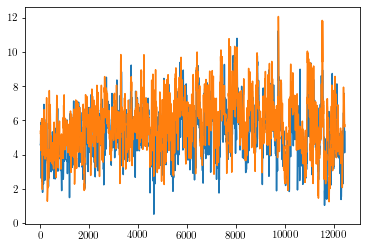

In [57]:
lidar_dfs[4][cond]['40m Wind Speed (m/s)'].plot()
lidar_dfs[4][cond]['150m Wind Speed (m/s)'].plot()